In [1]:
import geopandas as gpd

In [2]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df_bang = pd.read_csv("24_MOD13A2.006 Terra Vegetation Indices 16-Day Global 1km_Bangalore shapefiles.csv")
df_chennai = pd.read_csv("24_MOD13A2.006 Terra Vegetation Indices 16-Day Global 1km_Chennai shapefiles.csv")
df_delhi = pd.read_csv("24_MOD13A2.006 Terra Vegetation Indices 16-Day Global 1km_Delhi Shape Files.csv")
df_mumbai = pd.read_csv("24_MOD13A2.006 Terra Vegetation Indices 16-Day Global 1km_Mumbai shapefiles.csv")

In [4]:
df_bang.head()

,ASS_CONST1,EVI,NDVI,WARD_NAME,WARD_NO,date
0,Yelahanka,2049.325009,3749.680403,Kempegowda Ward,1.0,2000-02-18T00:00:00
1,Yelahanka,2173.734134,3984.821048,Chowdeswari Ward,2.0,2000-02-18T00:00:00
2,Yelahanka,2013.578811,3544.564853,Atturu,3.0,2000-02-18T00:00:00
3,Yelahanka,2257.561651,3960.141579,Yelahanka Satellite Town,4.0,2000-02-18T00:00:00
4,K.R. Puram,2208.604758,3754.638586,K R Puram,52.0,2000-02-18T00:00:00


In [5]:
df_chennai.head()

,EVI,NDVI,Ward_No,Zone_Name,Zone_No,date
0,2164.736253,3854.939547,0,St. Thomas Mount,-,2000-02-18T00:00:00
1,1828.857560,3793.179848,7,THIRUVOTTIYUR,I,2000-02-18T00:00:00
2,1004.904508,2745.285063,1,THIRUVOTTIYUR,I,2000-02-18T00:00:00
3,910.523639,2238.339073,2,THIRUVOTTIYUR,I,2000-02-18T00:00:00
4,1475.962406,3146.511768,3,THIRUVOTTIYUR,I,2000-02-18T00:00:00


In [6]:
df_delhi.head()

,EVI,NDVI,Ward_Name,Ward_No,date
0,1908.908293,3449.798267,NaN,NaN,2000-02-18T00:00:00
1,1856.574356,3192.695832,PUSA,150,2000-02-18T00:00:00
2,1915.048425,3079.115284,BHATI,176,2000-02-18T00:00:00
3,863.103856,1428.013392,DABRI,129,2000-02-18T00:00:00
4,1439.217421,2396.769225,DEOLI,173,2000-02-18T00:00:00


In [7]:
df_mumbai.head()

,EVI,NDVI,date,gid,name
0,752.675866,1633.026216,2000-02-18T00:00:00,1,A
1,655.656752,1349.610443,2000-02-18T00:00:00,2,B
2,640.692657,1277.904315,2000-02-18T00:00:00,3,C
3,1099.814742,2242.791811,2000-02-18T00:00:00,4,D
4,865.789163,1970.192934,2000-02-18T00:00:00,5,E


In [8]:
df_bang = df_bang.drop(columns=['ASS_CONST1','WARD_NO'])
df_chennai = df_chennai.drop(columns=['Zone_No'])
df_delhi = df_delhi.drop(columns=['Ward_No'])
df_mumbai = df_mumbai.drop(columns=['name'])

In [9]:
df_bang['date']=df_bang['date'].str.split('T').apply(lambda x:x[0])
df_bang['date']=pd.to_datetime(df_bang['date'].str.split('-').apply(lambda x:str(x[0])+'-'+str(x[1])+'-01'))
bang = pd.DataFrame({'ward_name':df_bang['WARD_NAME'],'date':df_bang['date'],'year':df_bang['date'].apply(lambda x:x.year),
                     'month':df_bang['date'].apply(lambda x:x.month),'EVI':df_bang['EVI'],'NDVI':df_bang['NDVI']})

df_chennai['date']=df_chennai['date'].str.split('T').apply(lambda x:x[0])
df_chennai['date']=pd.to_datetime(df_chennai['date'].str.split('-').apply(lambda x:str(x[0])+'-'+str(x[1])+'-01'))
chennai = pd.DataFrame({'zone_name':df_chennai['Zone_Name'],'ward_no':df_chennai['Ward_No'],'date':df_chennai['date'],
                        'year':df_chennai['date'].apply(lambda x:x.year),'month':df_chennai['date'].apply(lambda x:x.month),
                        'EVI':df_chennai['EVI'],'NDVI':df_chennai['NDVI']})

df_delhi['date']=df_delhi['date'].str.split('T').apply(lambda x:x[0])
df_delhi['date']=pd.to_datetime(df_delhi['date'].str.split('-').apply(lambda x:str(x[0])+'-'+str(x[1])+'-01'))
delhi = pd.DataFrame({'ward_name':df_delhi['Ward_Name'],'date':df_delhi['date'],'year':df_delhi['date'].apply(lambda x:x.year),
                      'month':df_delhi['date'].apply(lambda x:x.month),'EVI':df_delhi['EVI'],'NDVI':df_delhi['NDVI']})

df_mumbai['date']=df_mumbai['date'].str.split('T').apply(lambda x:x[0])
df_mumbai['date']=pd.to_datetime(df_mumbai['date'].str.split('-').apply(lambda x:str(x[0])+'-'+str(x[1])+'-01'))
mumbai = pd.DataFrame({'gid':df_mumbai['gid'],'date':df_mumbai['date'],'year':df_mumbai['date'].apply(lambda x:x.year),
                       'month':df_mumbai['date'].apply(lambda x:x.month),'EVI':df_mumbai['EVI'],'NDVI':df_mumbai['NDVI']})

In [10]:
bang.head()

,ward_name,date,year,month,EVI,NDVI
0,Kempegowda Ward,2000-02-01,2000,2,2049.325009,3749.680403
1,Chowdeswari Ward,2000-02-01,2000,2,2173.734134,3984.821048
2,Atturu,2000-02-01,2000,2,2013.578811,3544.564853
3,Yelahanka Satellite Town,2000-02-01,2000,2,2257.561651,3960.141579
4,K R Puram,2000-02-01,2000,2,2208.604758,3754.638586


In [11]:
chennai.head()

,zone_name,ward_no,date,year,month,EVI,NDVI
0,St. Thomas Mount,0,2000-02-01,2000,2,2164.736253,3854.939547
1,THIRUVOTTIYUR,7,2000-02-01,2000,2,1828.857560,3793.179848
2,THIRUVOTTIYUR,1,2000-02-01,2000,2,1004.904508,2745.285063
3,THIRUVOTTIYUR,2,2000-02-01,2000,2,910.523639,2238.339073
4,THIRUVOTTIYUR,3,2000-02-01,2000,2,1475.962406,3146.511768


In [12]:
delhi.head()

,ward_name,date,year,month,EVI,NDVI
0,NaN,2000-02-01,2000,2,1908.908293,3449.798267
1,PUSA,2000-02-01,2000,2,1856.574356,3192.695832
2,BHATI,2000-02-01,2000,2,1915.048425,3079.115284
3,DABRI,2000-02-01,2000,2,863.103856,1428.013392
4,DEOLI,2000-02-01,2000,2,1439.217421,2396.769225


In [13]:
mumbai.head()

,gid,date,year,month,EVI,NDVI
0,1,2000-02-01,2000,2,752.675866,1633.026216
1,2,2000-02-01,2000,2,655.656752,1349.610443
2,3,2000-02-01,2000,2,640.692657,1277.904315
3,4,2000-02-01,2000,2,1099.814742,2242.791811
4,5,2000-02-01,2000,2,865.789163,1970.192934


# Bangalore

In [14]:
bang_mean_monthly = bang.groupby('date').mean()
bang_mean_monthly.reset_index(inplace=True)

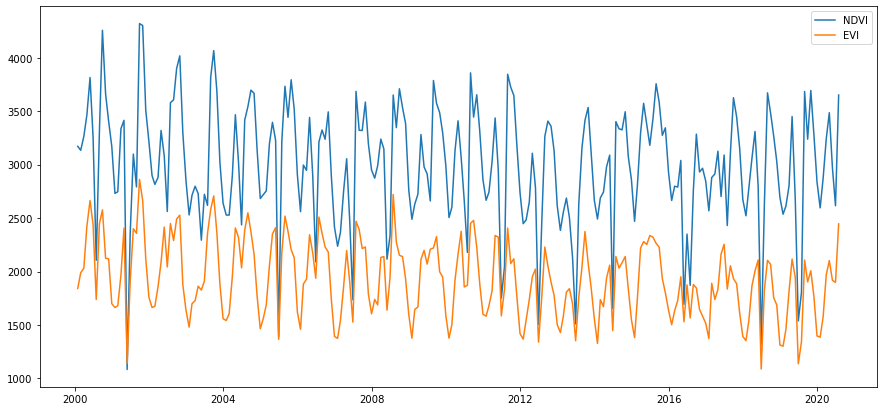

In [15]:
plt.figure(figsize=(15,7))
plt.plot(bang_mean_monthly['date'],bang_mean_monthly['NDVI'])
plt.plot(bang_mean_monthly['date'],bang_mean_monthly['EVI'])
plt.legend(['NDVI','EVI'])

* This graph illustrates the monthly changes in the vegetative index in Banglore over the span of 20 years.
* We can see similar patterns from one year to the other. This is due to seasonal changes.

In [16]:
bang_mean_yearly = bang.groupby('year').mean()
bang_mean_yearly.reset_index(inplace=True)

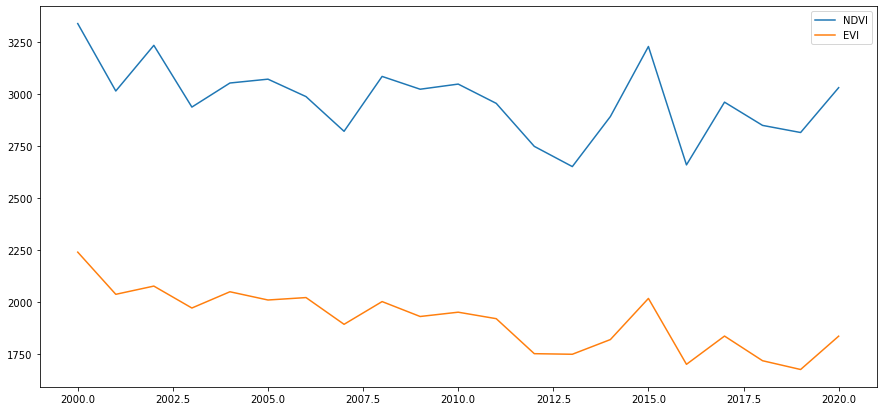

In [17]:
plt.figure(figsize=(15,7))
plt.plot(bang_mean_yearly['year'],bang_mean_yearly['NDVI'])
plt.plot(bang_mean_yearly['year'],bang_mean_yearly['EVI'])
plt.legend(['NDVI','EVI'])

* This graph illustrates the yearly trend of vegetative index in Bangalore from 2000 to 2020.
* As we can see there is decrease in the vegetative index in 2020 when compared from 2000.
* There is a sudden decrease in 2015 due to the exploitation of green lands by the industries.
* In 2014, a study revealed that 'Silicon valley of India' aka Bangalore has only 1 tree for every 7 persons.

<AxesSubplot:>

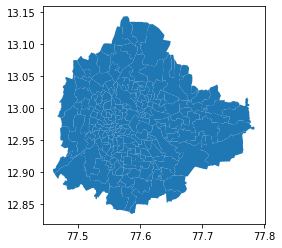

In [18]:
bang_map = gpd.read_file('BBMP-polygon.shp')
bang_map.plot()

In [19]:
bang_ward = bang.groupby('ward_name').mean()
bang_ward.drop(['year','month'],axis=1,inplace=True)
bang_wardmap = bang_map.merge(bang_ward,left_on='WARD_NAME',right_index=True)

<AxesSubplot:title={'center':'EVI'}>

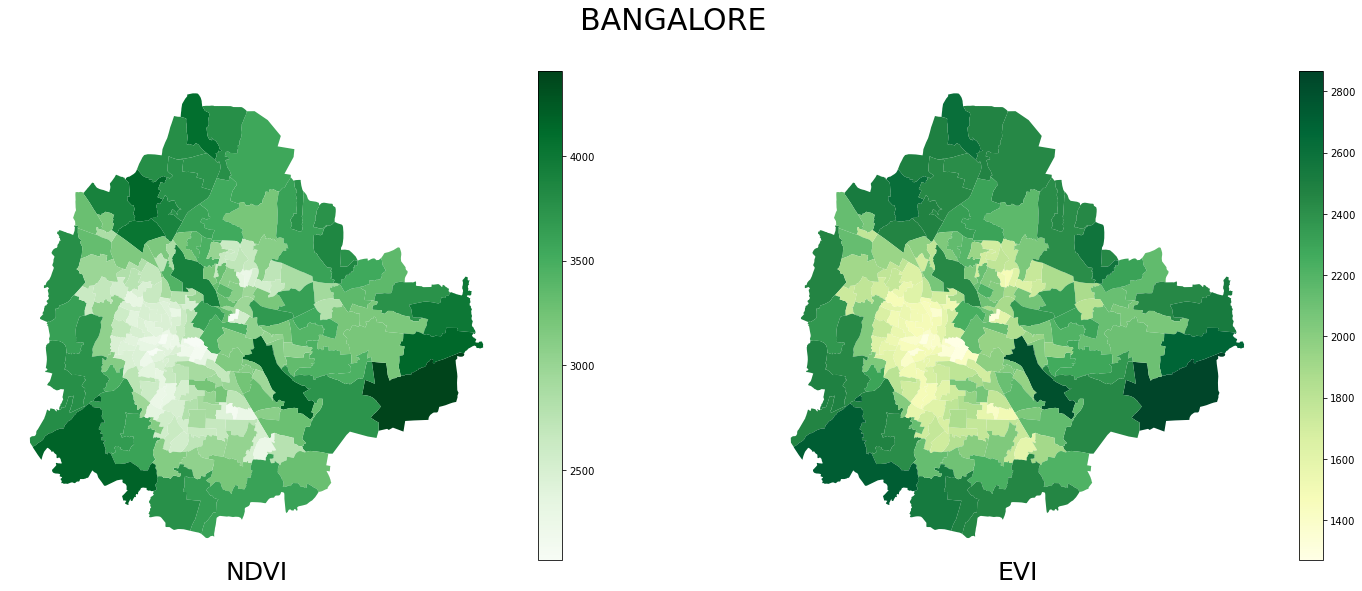

In [20]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(25,9))
fig.suptitle('BANGALORE',fontsize=30,fontweight=5)

ax[0].axis('off')
ax[0].set_title('NDVI',fontdict={'fontsize': '25', 'fontweight' : '2'},y=-0.05)
cmin = bang_wardmap['NDVI'].min()
cmax = bang_wardmap['NDVI'].max()
cb = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=cmin,vmax=cmax))
cb.set_array([])
fig.colorbar(cb,ax=ax[0])
bang_wardmap.plot(column='NDVI',ax=ax[0],cmap='Greens')

ax[1].axis('off')
ax[1].set_title('EVI',fontdict={'fontsize': '25', 'fontweight' : '2'},y=-0.05)
cmin = bang_wardmap['EVI'].min()
cmax = bang_wardmap['EVI'].max()
cb = plt.cm.ScalarMappable(cmap='YlGn', norm=plt.Normalize(vmin=cmin,vmax=cmax))
cb.set_array([])
fig.colorbar(cb,ax=ax[1])
bang_wardmap.plot(column='EVI',ax=ax[1],cmap='YlGn')

* 

<AxesSubplot:ylabel='EVI'>

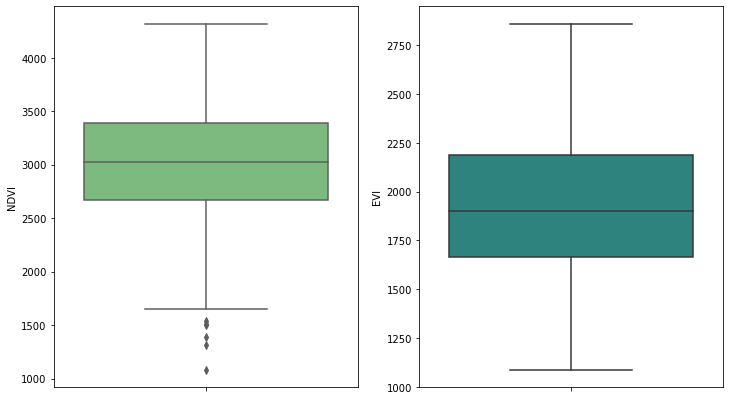

In [21]:
plt.figure(figsize=(12,7))

plt.subplot(121)
sns.boxplot(y='NDVI',data=bang_mean_monthly,palette='Greens')

plt.subplot(122)
sns.boxplot(y='EVI',data=bang_mean_monthly,palette='viridis')

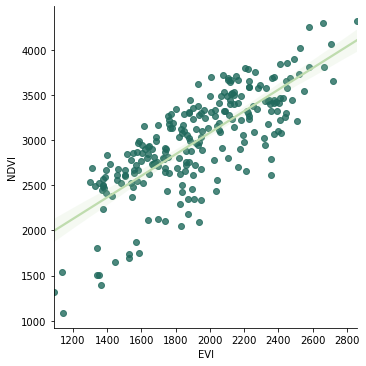

In [22]:
sns.lmplot(x='EVI',y='NDVI',data=bang_mean_monthly,line_kws={'color': '#bfdcae'},scatter_kws={'color': '#206a5d'})

# Chennai

In [23]:
chennai_mean_monthly = chennai.groupby('date').mean()
chennai_mean_monthly.reset_index(inplace=True)

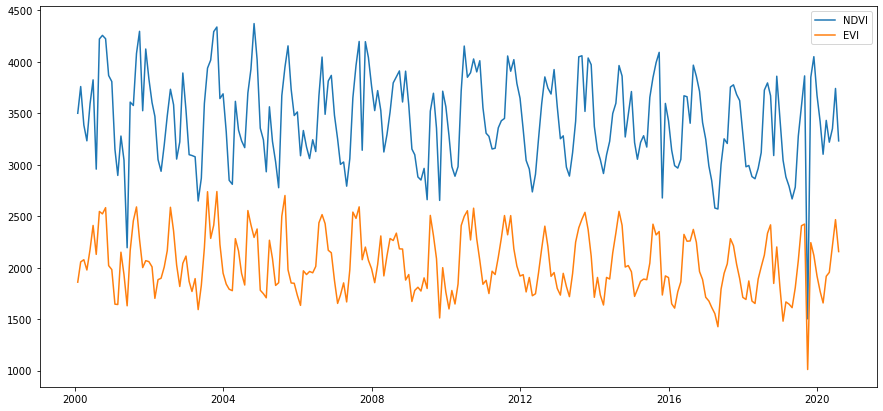

In [24]:
plt.figure(figsize=(15,7))
plt.plot(chennai_mean_monthly['date'],chennai_mean_monthly['NDVI'])
plt.plot(chennai_mean_monthly['date'],chennai_mean_monthly['EVI'])
plt.legend(['NDVI','EVI'])

* This graph illustrates the monthly changes in the vegetative index in Chennai over the span of 20 years.
* We can see similar patterns from one year to the other. This is due to seasonal changes.

In [25]:
chennai_mean_yearly = chennai.groupby('year').mean()
chennai_mean_yearly.reset_index(inplace=True)

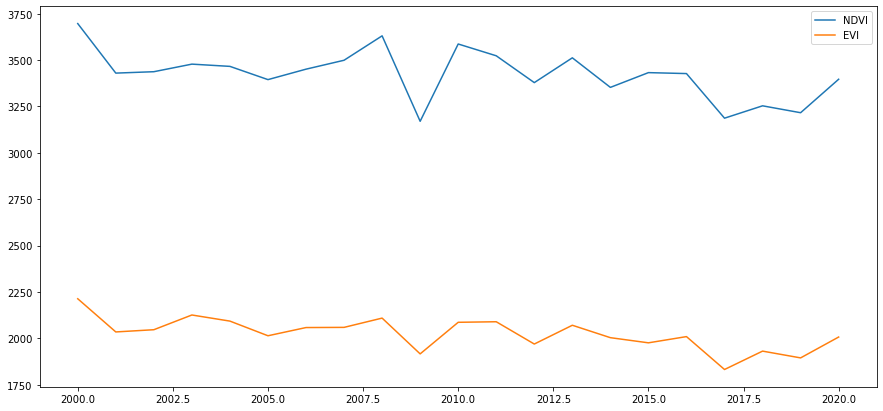

In [26]:
plt.figure(figsize=(15,7))
plt.plot(chennai_mean_yearly['year'],chennai_mean_yearly['NDVI'])
plt.plot(chennai_mean_yearly['year'],chennai_mean_yearly['EVI'])
plt.legend(['NDVI','EVI'])

<AxesSubplot:>

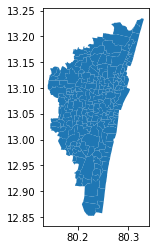

In [27]:
chennai_map = gpd.read_file('Wards-polygon.shp')
chennai_map.plot()

In [28]:
chennai_ward = chennai.groupby('ward_no').mean()
chennai_ward.drop(['year','month'],axis=1,inplace=True)
chennai_wardmap = chennai_map.merge(chennai_ward,left_on='Ward_No',right_index=True)

<AxesSubplot:title={'center':'EVI'}>

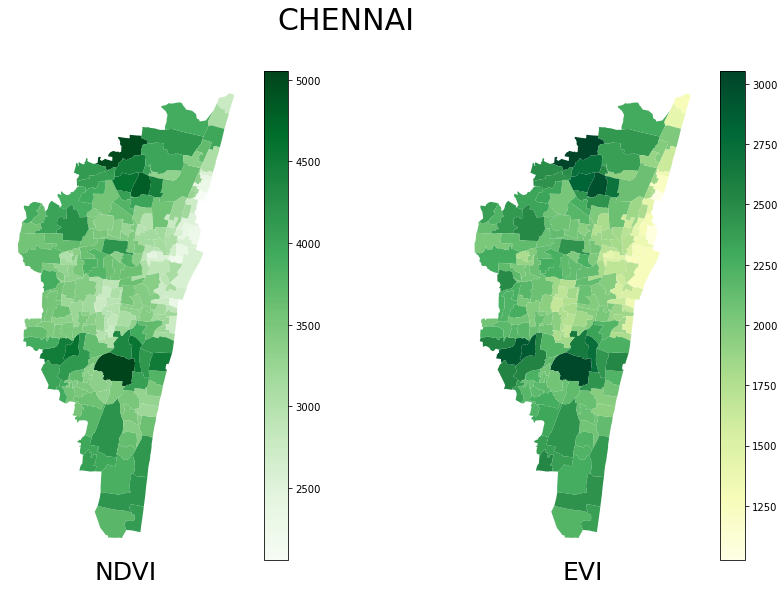

In [29]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,9))
fig.suptitle('CHENNAI',fontsize=30,fontweight=5)

ax[0].axis('off')
ax[0].set_title('NDVI',fontdict={'fontsize': '25', 'fontweight' : '2'},y=-0.05)
cmin = chennai_wardmap['NDVI'].min()
cmax = chennai_wardmap['NDVI'].max()
cb = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=cmin,vmax=cmax))
cb.set_array([])
fig.colorbar(cb,ax=ax[0])
chennai_wardmap.plot(column='NDVI',ax=ax[0],cmap='Greens')

ax[1].axis('off')
ax[1].set_title('EVI',fontdict={'fontsize': '25', 'fontweight' : '2'},y=-0.05)
cmin = chennai_wardmap['EVI'].min()
cmax = chennai_wardmap['EVI'].max()
cb = plt.cm.ScalarMappable(cmap='YlGn', norm=plt.Normalize(vmin=cmin,vmax=cmax))
cb.set_array([])
fig.colorbar(cb,ax=ax[1])
chennai_wardmap.plot(column='EVI',ax=ax[1],cmap='YlGn')

<AxesSubplot:ylabel='EVI'>

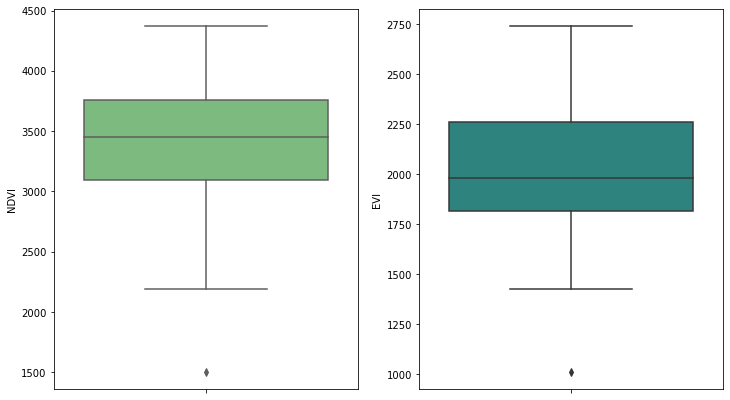

In [30]:
plt.figure(figsize=(12,7))

plt.subplot(121)
sns.boxplot(y='NDVI',data=chennai_mean_monthly,palette='Greens')

plt.subplot(122)
sns.boxplot(y='EVI',data=chennai_mean_monthly,palette='viridis')

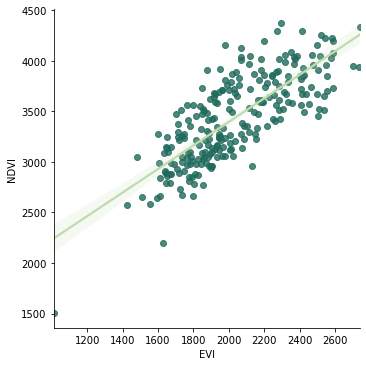

In [31]:
sns.lmplot(x='EVI',y='NDVI',data=chennai_mean_monthly,line_kws={'color': '#bfdcae'},scatter_kws={'color': '#206a5d'})

# Delhi

In [32]:
delhi_mean_monthly = delhi.groupby('date').mean()
delhi_mean_monthly.reset_index(inplace=True)

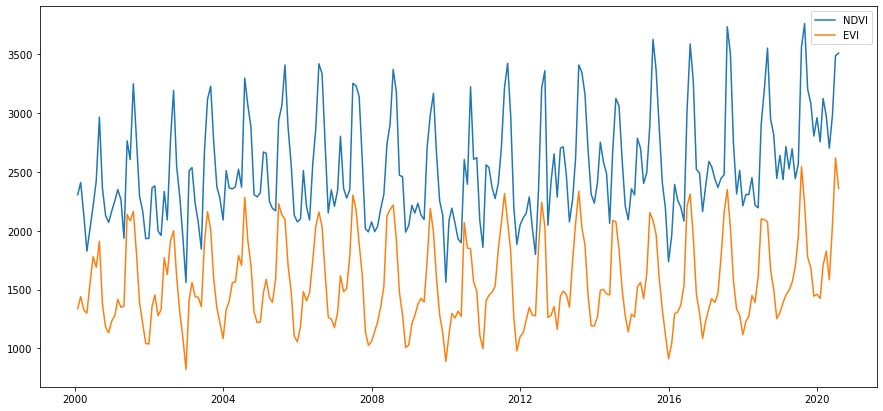

In [33]:
plt.figure(figsize=(15,7))
plt.plot(delhi_mean_monthly['date'],delhi_mean_monthly['NDVI'])
plt.plot(delhi_mean_monthly['date'],delhi_mean_monthly['EVI'])
plt.legend(['NDVI','EVI'])

* This graph illustrates the monthly changes in the vegetative index in Delhi over the span of 20 years.
* We can see similar patterns from one year to the other. This is due to seasonal changes.

In [34]:
delhi_mean_yearly = delhi.groupby('year').mean()
delhi_mean_yearly.reset_index(inplace=True)

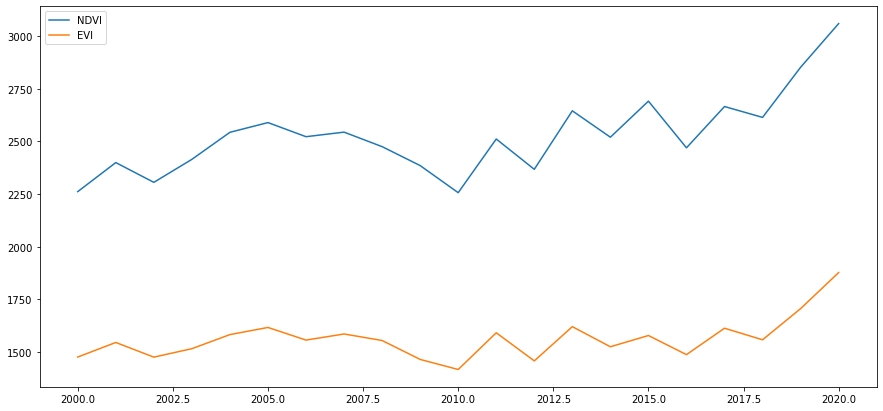

In [35]:
plt.figure(figsize=(15,7))
plt.plot(delhi_mean_yearly['year'],delhi_mean_yearly['NDVI'])
plt.plot(delhi_mean_yearly['year'],delhi_mean_yearly['EVI'])
plt.legend(['NDVI','EVI'])

<AxesSubplot:>

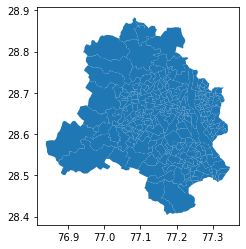

In [36]:
delhi_map = gpd.read_file('Delhi_Wards-polygon.shp')
delhi_map.plot()

In [37]:
delhi_ward = delhi.dropna().groupby('ward_name').mean()
delhi_ward.drop(['year','month'],axis=1,inplace=True)
delhi_wardmap = delhi_map.merge(delhi_ward,left_on='Ward_Name',right_index=True)

<AxesSubplot:title={'center':'EVI'}>

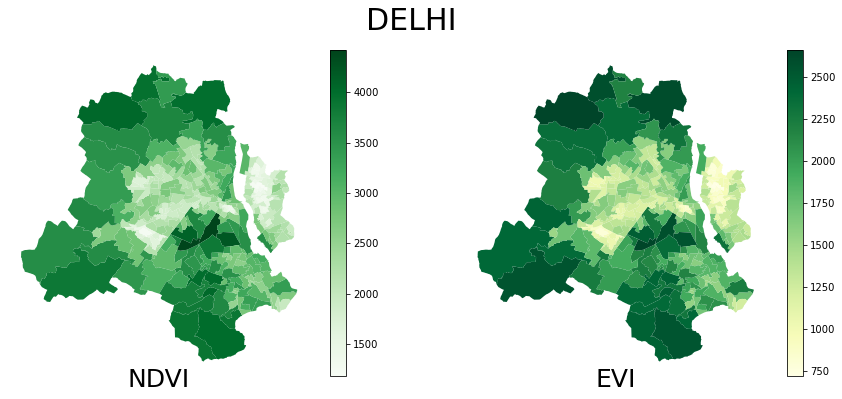

In [38]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
fig.suptitle('DELHI',fontsize=30,fontweight=5)

ax[0].axis('off')
ax[0].set_title('NDVI',fontdict={'fontsize': '25', 'fontweight' : '2'},y=-0.05)
cmin = delhi_wardmap['NDVI'].min()
cmax = delhi_wardmap['NDVI'].max()
cb = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=cmin,vmax=cmax))
cb.set_array([])
fig.colorbar(cb,ax=ax[0])
delhi_wardmap.plot(column='NDVI',ax=ax[0],cmap='Greens')

ax[1].axis('off')
ax[1].set_title('EVI',fontdict={'fontsize': '25', 'fontweight' : '2'},y=-0.05)
cmin = delhi_wardmap['EVI'].min()
cmax = delhi_wardmap['EVI'].max()
cb = plt.cm.ScalarMappable(cmap='YlGn', norm=plt.Normalize(vmin=cmin,vmax=cmax))
cb.set_array([])
fig.colorbar(cb,ax=ax[1])
delhi_wardmap.plot(column='EVI',ax=ax[1],cmap='YlGn')

<AxesSubplot:ylabel='EVI'>

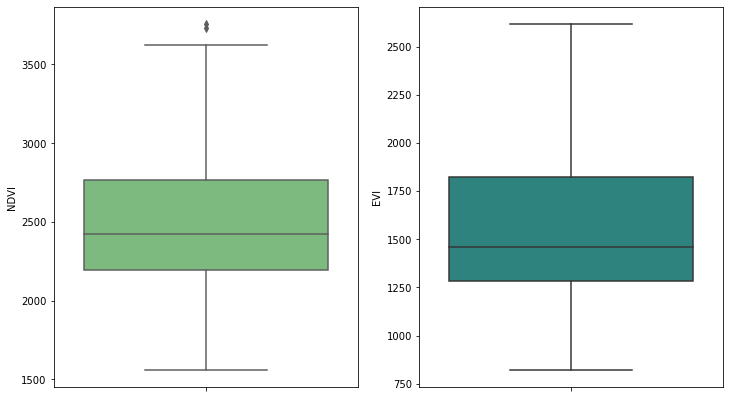

In [39]:
plt.figure(figsize=(12,7))

plt.subplot(121)
sns.boxplot(y='NDVI',data=delhi_mean_monthly,palette='Greens')

plt.subplot(122)
sns.boxplot(y='EVI',data=delhi_mean_monthly,palette='viridis')

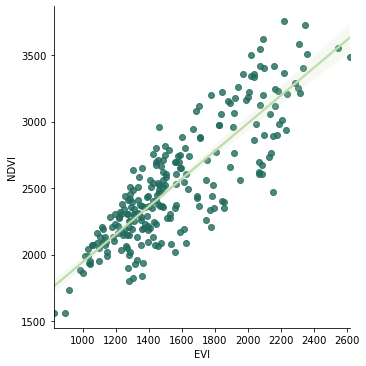

In [40]:
sns.lmplot(x='EVI',y='NDVI',data=delhi_mean_monthly,line_kws={'color': '#bfdcae'},scatter_kws={'color': '#206a5d'})

# Mumbai

In [41]:
mumbai_mean_monthly = mumbai.groupby('date').mean()
mumbai_mean_monthly.reset_index(inplace=True)

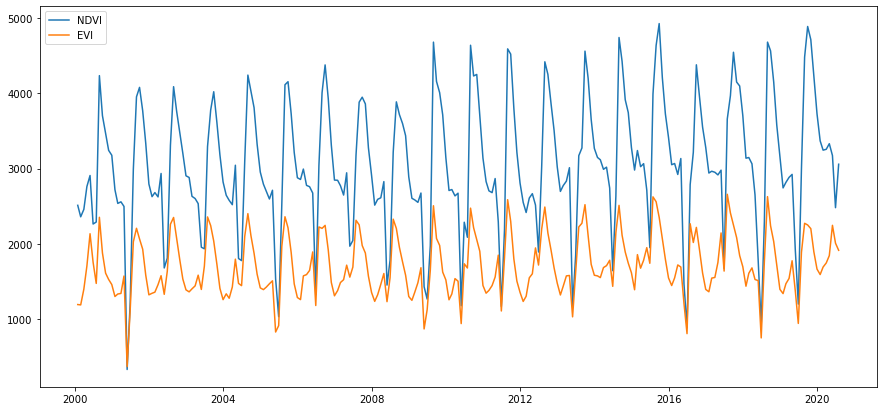

In [42]:
plt.figure(figsize=(15,7))
plt.plot(mumbai_mean_monthly['date'],mumbai_mean_monthly['NDVI'])
plt.plot(mumbai_mean_monthly['date'],mumbai_mean_monthly['EVI'])
plt.legend(['NDVI','EVI'])

* This graph illustrates the monthly changes in the vegetative index in Mumbai over the span of 20 years.
* We can see similar patterns from one year to the other. This is due to seasonal changes.

In [43]:
mumbai_mean_yearly = mumbai.groupby('year').mean()
mumbai_mean_yearly.reset_index(inplace=True)

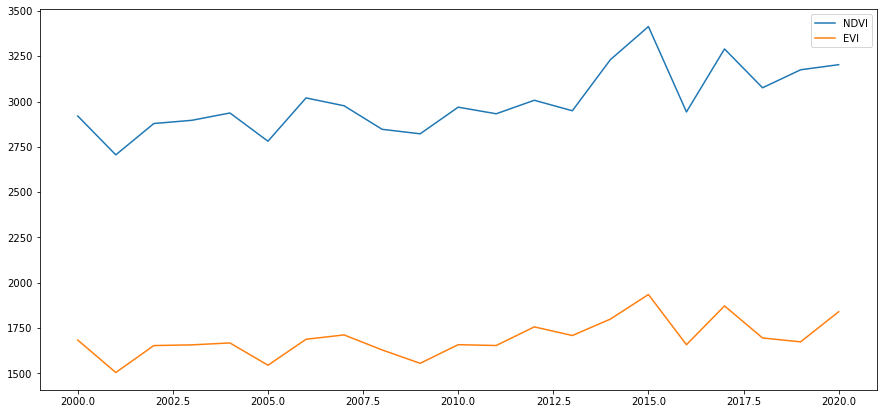

In [44]:
plt.figure(figsize=(15,7))
plt.plot(mumbai_mean_yearly['year'],mumbai_mean_yearly['NDVI'])
plt.plot(mumbai_mean_yearly['year'],mumbai_mean_yearly['EVI'])
plt.legend(['NDVI','EVI'])

<AxesSubplot:>

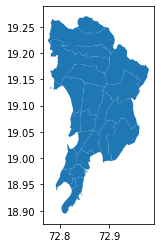

In [45]:
mumbai_map = gpd.read_file('BMC_Wards-polygon.shp')
mumbai_map.plot()

In [46]:
mumbai_ward = mumbai.groupby('gid').mean()
mumbai_ward.drop(['year','month'],axis=1,inplace=True)
mumbai_wardmap = mumbai_map.merge(chennai_ward,left_on='gid',right_index=True)

<AxesSubplot:title={'center':'EVI'}>

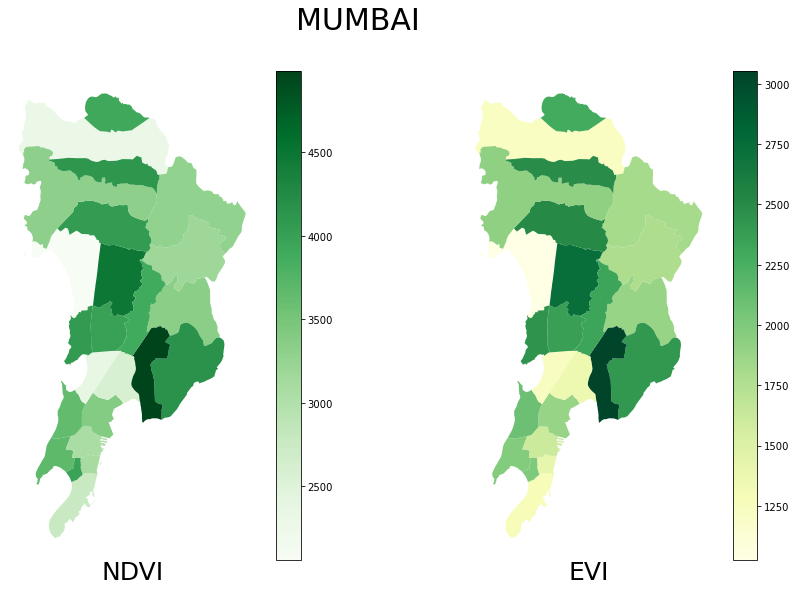

In [47]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,9))
fig.suptitle('MUMBAI',fontsize=30,fontweight=5)

ax[0].axis('off')
ax[0].set_title('NDVI',fontdict={'fontsize': '25', 'fontweight' : '2'},y=-0.05)
cmin = mumbai_wardmap['NDVI'].min()
cmax = mumbai_wardmap['NDVI'].max()
cb = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=cmin,vmax=cmax))
cb.set_array([])
fig.colorbar(cb,ax=ax[0])
mumbai_wardmap.plot(column='NDVI',ax=ax[0],cmap='Greens')

ax[1].axis('off')
ax[1].set_title('EVI',fontdict={'fontsize': '25', 'fontweight' : '2'},y=-0.05)
cmin = mumbai_wardmap['EVI'].min()
cmax = mumbai_wardmap['EVI'].max()
cb = plt.cm.ScalarMappable(cmap='YlGn', norm=plt.Normalize(vmin=cmin,vmax=cmax))
cb.set_array([])
fig.colorbar(cb,ax=ax[1])
mumbai_wardmap.plot(column='EVI',ax=ax[1],cmap='YlGn')

<AxesSubplot:ylabel='EVI'>

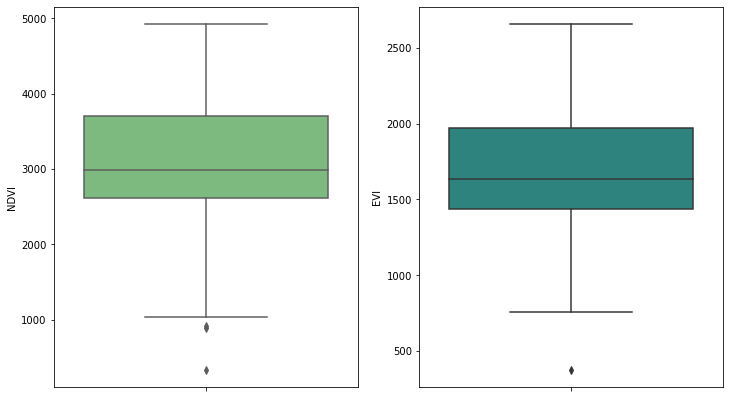

In [48]:
plt.figure(figsize=(12,7))

plt.subplot(121)
sns.boxplot(y='NDVI',data=mumbai_mean_monthly,palette='Greens')

plt.subplot(122)
sns.boxplot(y='EVI',data=mumbai_mean_monthly,palette='viridis')

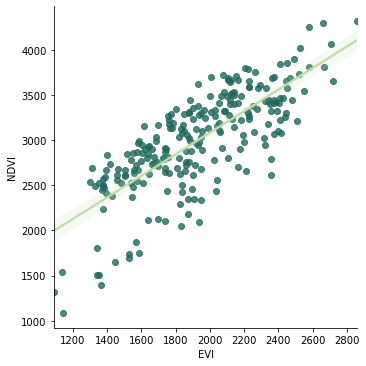

In [49]:
sns.lmplot(x='EVI',y='NDVI',data=bang_mean_monthly,line_kws={'color': '#bfdcae'},scatter_kws={'color': '#206a5d'})